In [2]:
import datetime as datetime
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataEventos = pd.read_csv("../events.csv.gzip", compression='gzip')
dataAuctions = pd.read_csv("../auctions.csv.gzip", compression='gzip')
dataClicks = pd.read_csv("../clicks.csv.gzip", compression='gzip')
dataInstalls = pd.read_csv("../installs.csv.gzip", compression='gzip')

/home/martin/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataAuctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    float64
country            int64
date               object
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.0+ GB


In [4]:
dataClicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), float64(11), int64(6), object(2)
memory usage: 3.8+ MB


In [5]:
dataInstalls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


In [6]:
dataEventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  object
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              object
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  object
connection_type       object
ip_address            int64
device_language       float64
dtypes: bool(1), float64(10), int64(6), object(5)
memory usage: 402.0+ MB


In [7]:
dataEventos.head(20)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18
5,2019-03-09 20:29:45.449,4,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,bb8a02a1-622e-47c5-8eb0-36679cb4f8be,2.248157e+17,2.464594e+18,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18
6,2019-03-09 20:29:40.602,5,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,eab8937b-2841-4e53-821b-ad5bfcf0d29d,2.248157e+17,4.956615e+18,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18
7,2019-03-09 20:45:12.067,0,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,c5cac55d-468c-493a-a4da-9b13f277804f,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18
8,2019-03-09 20:40:07.977,0,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,e381d11e-0cd9-4388-8e71-0348bb54c6ef,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18
9,2019-03-09 20:27:09.984,1,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,6f3dde45-638f-4be6-8e57-945d44b4fd8f,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [8]:
#Convierto la fecha de crecion en un datetime64[ns]
dataEventos['date'] = pd.to_datetime(dataEventos['date'])

In [9]:
#Agregado de cantidad de eventos por persona.
groupbyCantEventos = dataEventos.groupby('ref_hash', as_index = False)['event_id'].agg({'cantEventos': 'count'})
groupbyCantEventos.sort_values(by = 'cantEventos', ascending = False)
dataEventos = pd.merge(dataEventos, groupbyCantEventos, on = 'ref_hash')

In [10]:
#Los 10 eventos que mas se realizaron
groupbyEvento = dataEventos.groupby('event_id', as_index = False)['ref_type'].agg({'cantEvento': 'count'})
groupbyEvento.nlargest(10, "cantEvento")

,event_id,cantEvento
21,22,618228
30,31,417070
156,161,217846
1,1,157812
134,138,100039
157,162,84898
303,329,56490
151,156,53332
32,33,48581
164,171,43942


In [11]:
#Las 5 applicaciones mas populares
groupbyApplication = dataEventos.groupby('application_id', as_index=False)['event_id'].agg({'cantEventos': 'count'})
groupbyApplication.nlargest(10, 'cantEventos')

,application_id,cantEventos
52,66,325696
50,64,259084
125,145,252431
49,63,181555
86,103,137513
43,57,134498
102,121,123711
187,212,108489
95,113,82962
27,39,76448


In [12]:
#Las 5 aplicaciones con mas eventos.
mostpopularapps = groupbyApplication.nlargest(5, 'cantEventos').application_id.to_list()

/home/martin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Cantidad eventos')

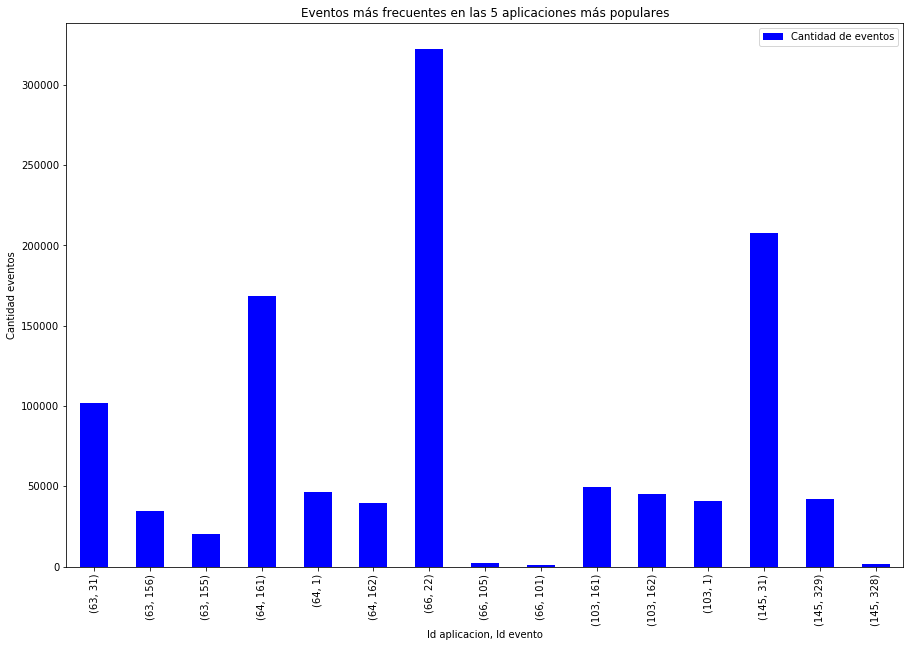

In [42]:
#Los 3 eventos mas realizados en las 5 aplicaciones que tienen mas eventos.
dataEventosAppsPopulares = dataEventos.loc[dataEventos['application_id'].isin(mostpopularapps) , :]
groupbyAppsEventos = dataEventosAppsPopulares.groupby(['application_id', 'event_id'])['date'].agg({'Cantidad de eventos' : 'count'})
eventosAppsPopularesPlot = groupbyAppsEventos.sort_index(ascending=[1,0]).groupby(level=0, as_index=False).apply(lambda x: x.nlargest(3, 'Cantidad de eventos') if len(x) >= 3 else x.head(0)).reset_index(level=0, drop=True).plot.bar(color='blue', figsize=(15,10), title="Eventos más frecuentes en las 5 aplicaciones más populares")
eventosAppsPopularesPlot.set_xlabel("Id aplicacion, Id evento")
eventosAppsPopularesPlot.set_ylabel("Cantidad eventos")

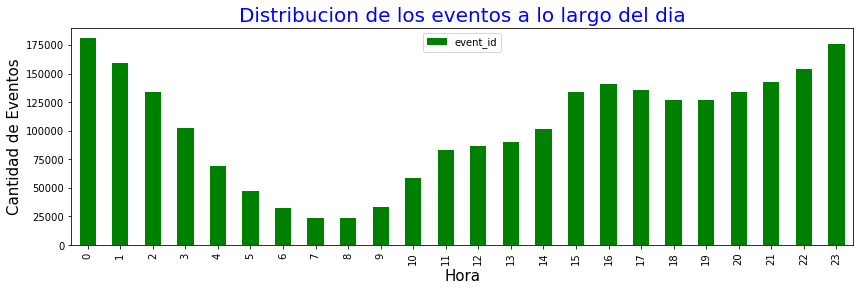

In [14]:
#Quiero mostrar la cantidad de eventos que ocurren dependiendo de la hora.
dataEventosPerHour = dataEventos.loc[:,['date','event_id']]
dataEventosPerHour['hour'] = dataEventosPerHour['date'].apply(lambda x: x.hour)
dataEventosPerHour.loc[:,['event_id','hour']].groupby('hour').agg(np.size).plot(kind='bar',figsize=(14,4), color='green')
plt.title('Distribucion de los eventos a lo largo del dia' , fontsize = 20, color = 'blue')  
plt.ylabel('Cantidad de Eventos', fontsize = 15);
plt.xlabel('Hora', fontsize = 15);

In [15]:
dataEventos.device_countrycode.value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

In [16]:
dataInstalls.head(20)

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18
5,2019-03-10 22:24:57.545,0,1891515180541284343,8355110941557237501,NaN,False,False,6333597102633388268,1.083369e+18,7.876612e+18,NaN,NaN,NaN,NaN,NaN,NaN,685400811232710215,NaN
6,2019-03-11 03:47:22.802,0,1891515180541284343,4306303321567254439,NaN,False,True,6333597102633388268,3.083059e+17,9.179743e+18,HasOffers Mobile AppTracking v1.0,NaN,b3f7905b-5058-4eca-853c-b3c670d7ac54,Open,NaN,NaN,7462893331703692427,4.073835e+18
7,2019-03-11 21:21:05.986,0,1891515180541284343,1670430602051291592,NaN,False,False,6333597102633388268,1.083369e+18,7.551685e+17,NaN,NaN,NaN,NaN,NaN,NaN,5634136297886425939,NaN
8,2019-03-11 21:21:05.855,0,1891515180541284343,1670430602051291592,NaN,False,True,6333597102633388268,1.083369e+18,7.551685e+17,HasOffers Mobile AppTracking v1.0,NaN,28a6e6a0-ba70-46a2-a63f-1e74b0dd5235,Open,NaN,NaN,5634136297886425939,3.301378e+18
9,2019-03-13 08:29:31.875,2,1891515180541284343,5651666841804012468,NaN,False,False,6333597102633388268,3.083059e+17,8.656854e+18,http-kit/2.0,Dalvik/2.1.0 (Linux; U; Android 22; SM-J200M B...,NaN,NaN,True,NaN,5997848429649592955,9.028383e+18


In [17]:
#Todos los atributed son falsos.
dataInstalls.attributed.value_counts()

False    3412
Name: attributed, dtype: int64

In [18]:
dataInstalls.implicit.value_counts()

False    2547
True      865
Name: implicit, dtype: int64

Text(0, 0.5, 'Id aplicación')

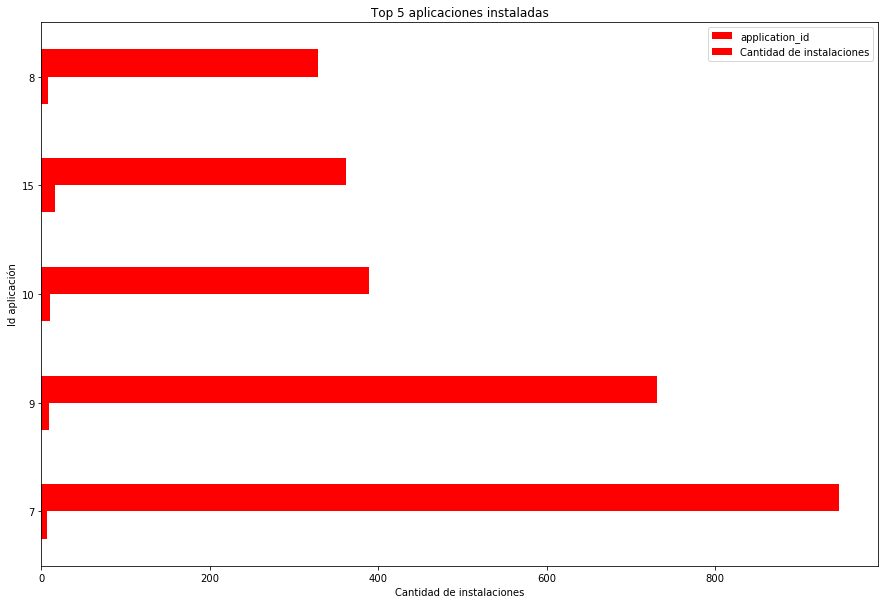

In [46]:
#Las 5 aplicaciones mas instaladas
groupByInstalledApplications = dataInstalls.groupby('application_id', as_index=False)['created'].agg({'Cantidad de instalaciones' : 'count'})
installedApplicationsPlot = groupByInstalledApplications.nlargest(5, 'Cantidad de instalaciones').plot.barh(color='red', figsize=(15,10), title="Top 5 aplicaciones instaladas")
installedApplicationsPlot.set_xlabel("Cantidad de instalaciones")
installedApplicationsPlot.set_ylabel("Id aplicación")

In [20]:
#Las aplicaciones que mas instalaciones implicitas tiene.
implicitInstalations = dataInstalls.loc[dataInstalls['implicit'] == True,:]
groupByImplicitInstalations = implicitInstalations.groupby('application_id', as_index=False)['ref_hash'].agg({'Cantidad de instalaciones':'count'})
groupByImplicitInstalations.nlargest(5, 'Cantidad de instalaciones')

,application_id,Cantidad de instalaciones
6,9,196
4,7,172
7,10,142
5,8,102
10,16,93


In [21]:
#Las 3 personas que instalaron mas aplicaciones
groupByApplicationPerPerson = dataInstalls.groupby('ref_hash', as_index=False)['application_id'].agg({'Cantidad de aplicaciones':'count'})
groupByApplicationPerPerson.nlargest(3, 'Cantidad de aplicaciones')

,ref_hash,Cantidad de aplicaciones
1069,3272750442824629569,4
1710,5208834946313176321,4
122,394181128078904930,3


In [22]:
dataClicks.head(20)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525
5,5,NaN,4,2019-03-07T18:02:25.833Z,6333597102633388268,1.209638,1.064208,False,27.0,dhc5iaRvlrI9OgkXDWnMRrAY47xWozY,3.025219e+18,NaN,1.774085e+18,392184377613098015,1.0,NaN,0.606,0.459,1891515180541284343,7925959310979071406
6,3,NaN,1,2019-03-12T15:17:04.453Z,6333597102633388268,1.209638,1.064208,False,27.0,cOm-_s2_6NkoDWYNu_QaMk-v4sf34h4,3.378640e+18,3.032809e+17,4.566454e+18,2733035977666442898,1.0,NaN,NaN,NaN,1891515180541284343,1709687652740629839
7,1,NaN,2,2019-03-06T19:15:47.249Z,6333597102633388268,1.205393,1.077238,False,NaN,MbDYk_2nKmKtOQgAIRx-aDJ66VIGsrE,NaN,NaN,NaN,8930605132947907029,NaN,NaN,NaN,NaN,1891515180541284343,2127839020694198991
8,3,NaN,0,2019-03-07T23:11:01.934Z,6333597102633388268,1.205058,1.077332,False,19.0,1wsFgNNvk6PT1QSSIdmmwmqp0E3k7io,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,3.129,0.889,0.977,1891515180541284343,5073558237453939035
9,3,NaN,1,2019-03-07T23:06:30.642Z,6333597102633388268,1.205689,1.070234,False,18.0,ZLZz1XHsA5Xkuq_TXNfT49j_H4mfTwg,3.378640e+18,NaN,4.566454e+18,2733035977666442898,1.0,1.707,0.466,0.985,1891515180541284343,70349377423764005


In [23]:
dataClicks.advertiser_id.value_counts()

3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

In [24]:
#Los 5 promedios de tiempo mas rapido para hacer click en la publicidad
groupByAdvertiserTime = dataClicks.groupby('advertiser_id', as_index=False)['timeToClick'].agg({'Cantidad de tiempos':'count', 'Promedio de tiempo': 'mean'})
groupByAdvertiserTime.loc[groupByAdvertiserTime['Cantidad de tiempos'] > 10,:]

,advertiser_id,Cantidad de tiempos,Promedio de tiempo
3,3,22964,230.505929


In [25]:
#Distribucion de donde se mostro el advertiser con id 3
dataAdvertiser3 = dataClicks.loc[dataClicks['advertiser_id'] == 3, :]
groupBySource = dataAdvertiser3.groupby('source_id')['ref_hash'].agg({'Cantidad de clicks':'count'})
groupBySource.nlargest(10, 'Cantidad de clicks')
#Los otros que aparecian no aportaban nada porque eran valores muy bajos.

/home/martin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,Cantidad de clicks
source_id,
0,16980
1,4271
6,3364
5,1625
2,19
7,2
3,1
9,1


In [26]:
#Devices desde donde se hizo el click al advertiser con id 3
groupByDevice = dataAdvertiser3.groupby('ref_type')['ref_hash'].agg({'Cantidad de devices':'count'})
groupByDevice

/home/martin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Cantidad de devices
ref_type,
1494519392962156891,699
1891515180541284343,25501
5016171802147987303,58
6323871695571587575,5


In [27]:
dataAuctions.head(20)

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0
5,NaN,6333597102633388268,2019-03-11 14:18:37.939485,1448534231953777480,1,1,0
6,NaN,6333597102633388268,2019-03-11 14:18:39.285471,7197160868095710320,1,1,0
7,NaN,6333597102633388268,2019-03-11 14:18:42.823963,160071254383181872,1,1,0
8,NaN,6333597102633388268,2019-03-11 14:18:43.587421,961481517958884390,1,1,0
9,NaN,6333597102633388268,2019-03-11 14:18:44.470248,2960551690927930513,1,1,0


In [28]:
#Todos los auction type son NaN
dataAuctions.auction_type_id.isnull().value_counts()

True    19571319
Name: auction_type_id, dtype: int64

In [29]:
#Convierto la fecha de crecion en un datetime64[ns]
dataAuctions['date'] = pd.to_datetime(dataAuctions['date'])

In [30]:
dataAuctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    float64
country            int64
date               datetime64[ns]
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 1.0 GB


In [31]:
dataAuctions['fecha'] = dataAuctions['date'].dt.day.astype(str) + "-" + dataAuctions['date'].dt.month.astype(str) + "-" + dataAuctions['date'].dt.year.astype(str)

In [32]:
groupByDate = dataAuctions.groupby('fecha')['device_id'].agg({'Cantidad de auctions' : 'count'})
groupByDate

/home/martin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Cantidad de auctions
fecha,
10-3-2019,2637534
11-3-2019,2574916
12-3-2019,2779910
13-3-2019,2938373
5-3-2019,1182401
6-3-2019,1032970
7-3-2019,2047661
8-3-2019,2303002
9-3-2019,2074552


In [33]:
promedioAuctionsPorDia = dataAuctions['fecha'].count() / dataAuctions['fecha'].unique().size
promedioAuctionsPorDia

2174591.0

In [34]:
dataAuctions['hour'] = dataAuctions['date'].dt.hour

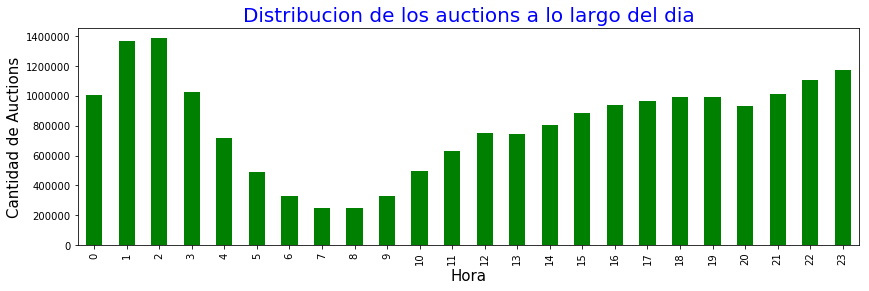

In [35]:
#Cantidad de auctions a lo largo del dia.
dataAuctions.groupby('hour')['device_id'].agg(np.size).plot(kind='bar',figsize=(14,4), color='green')
plt.title('Distribucion de los auctions a lo largo del dia' , fontsize = 20, color = 'blue')  
plt.ylabel('Cantidad de Auctions', fontsize = 15);
plt.xlabel('Hora', fontsize = 15);

In [36]:
promedioAuctionsPorDevice = dataAuctions.shape[0] / dataAuctions['device_id'].unique().size
promedioAuctionsPorDevice

94.55794122052208

In [37]:
groupByDevice = dataAuctions.groupby('device_id', as_index=False)['date'].agg({'Cantidad de auctions' : 'count'})
deviceSuperanPromedioAuctions = groupByDevice.loc[groupByDevice['Cantidad de auctions'] > promedioAuctionsPorDevice,:]

In [38]:
#Porcentaje de devices que superan al promedio de auctions por device
deviceSuperanPromedioAuctions.shape[0] / dataAuctions['device_id'].unique().size

0.1972924527846089

In [39]:
groupBySource = dataAuctions.groupby('source_id', as_index=False)['date'].agg({'Cantidad de auctions' : 'count'})
groupBySource

,source_id,Cantidad de auctions
0,0,13354597
1,1,4016739
2,2,582083
3,5,1466494
4,6,151406
